In [4]:
from keras.models import Sequential ,Model
from keras.layers import Flatten, Input
from keras.layers import Dense
input_layer = Input( shape=(1,13))
h = Dense(13 ,activation='relu',name='feature')(input_layer)
h = Dense(8,activation='relu')(h)
h= Flatten()(h)      
        
out =Dense(1, activation='sigmoid')(h)
# compile the keras model
model = Model(inputs=[input_layer], outputs=[out])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1, 13)             0         
_________________________________________________________________
feature (Dense)              (None, 1, 13)             182       
_________________________________________________________________
dense_4 (Dense)              (None, 1, 8)              112       
_________________________________________________________________
flatten_2 (Flatten)          (None, 8)                 0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


In [7]:
import pandas as pd
data = pd.read_excel('/content/drive/My Drive/New-MRI/data.xls')
data

,age,sex,Cp,trestbps,chol,fbs,restecg,thalach,exang,Oldpeak,slope,ca,Thal,Diagnosis
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62,1,4,145,282,0,2,142,1,2.8,2,2,7,2
295,55,0,4,120,188,0,0,113,0,1.4,2,1,7,2
296,46,0,2,130,219,0,2,188,0,0.0,1,0,3,1
297,45,1,4,112,290,0,2,153,0,0.0,1,1,3,2


In [0]:
dataset_data=data.loc[:, data.columns != 'Diagnosis'].values
dataset_labels =  data['Diagnosis'].values

In [9]:
dataset_data1 = dataset_data.reshape(299, 1, 13)
dataset_data1.shape

(299, 1, 13)

In [10]:
model.fit(dataset_data1,dataset_labels,epochs=10)




Epoch 1/10





299/299 [==============================] - 1s 2ms/step - loss: -6.2580 - acc: 0.5518
Epoch 2/10
299/299 [==============================] - 0s 79us/step - loss: -7.1447 - acc: 0.5518
Epoch 3/10
299/299 [==============================] - 0s 63us/step - loss: -7.1447 - acc: 0.5518
Epoch 4/10
299/299 [==============================] - 0s 68us/step - loss: -7.1447 - acc: 0.5518
Epoch 5/10
299/299 [==============================] - 0s 55us/step - loss: -7.1447 - acc: 0.5518
Epoch 6/10
299/299 [==============================] - 0s 54us/step - loss: -7.1447 - acc: 0.5518
Epoch 7/10
299/299 [==============================] - 0s 61us/step - loss: -7.1447 - acc: 0.5518
Epoch 8/10
299/299 [==============================] - 0s 52us/step - loss: -7.1447 - acc: 0.5518
Epoch 9/10
299/299 [==============================] - 0s 56us/step - loss: -7.1447 - acc: 0.5518
Epoch 10/10
299/299 [==============================] - 0s 58us/step - loss: -7.1447 - acc: 0.5518


In [0]:
layer_outputs = [layer.output for layer in model.layers[1:2]]
activation_model = Model(inputs=model.input,outputs=layer_outputs)


In [0]:
activations = activation_model.predict(dataset_data1[:])

In [59]:
activations

array([[[  0.      , 129.14838 ,  74.07711 , ..., 100.704475,
          51.675026,   0.      ]],

       [[  0.      , 216.56827 , 124.22936 , ..., 155.46855 ,
          53.30841 ,   0.      ]],

       [[  0.      ,  83.97661 ,  57.294994, ...,  81.09949 ,
          46.872246,   0.      ]],

       ...,

       [[  0.      ,  44.934128,  44.558735, ...,  66.23241 ,
          40.118057,   0.      ]],

       [[  0.      ,  89.161446,  61.993042, ...,  83.18979 ,
          39.642586,   0.      ]],

       [[  0.      ,  51.744473,  40.198544, ...,  58.187077,
          38.16308 ,   0.      ]]], dtype=float32)

In [0]:
dataset = activations.reshape(299,13)

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [16]:
rf = RandomForestClassifier(random_state=1400)
rf.fit(dataset,dataset_labels)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1400,
                       verbose=0, warm_start=False)

In [49]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf,dataset,dataset_labels, cv=5)
scores

array([0.66666667, 0.68333333, 0.63333333, 0.65      , 0.6440678 ])

In [50]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.66 (+/- 0.04)


In [0]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
transformer = SelectKBest(score_func=chi2)

In [0]:
Xt_chi2 = transformer.fit_transform(dataset,dataset_labels)

In [29]:
print(transformer.scores_)

[           nan 1.82492863e+02 1.39242702e+01 6.66830134e-02
 6.05013503e+00 2.48962378e+01            nan            nan
            nan            nan 2.53047846e+01 3.76862195e+01
            nan]


In [0]:
dataset_end = dataset[:,[ 3,4,5,11]]

In [47]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(rf,dataset_end,dataset_labels, cv=5)
scores

array([0.78333333, 0.68333333, 0.71666667, 0.63333333, 0.69491525])

In [48]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.70 (+/- 0.10)


In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset,dataset_labels , test_size = 0.2, random_state = 0)

In [0]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

In [0]:
rf = RandomForestClassifier(random_state=best_x)
rf.fit(X_train,y_train)
Y_pred_rf = rf.predict(X_test)

In [54]:
score_rf = round(accuracy_score(Y_pred_rf,y_test)*100,2)

print("The accuracy score achieved using Decision Tree is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 75.0 %


In [0]:
from sklearn.svm import SVC
params = {'kernel': 'rbf'}
classifier = SVC(**params)

In [56]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(classifier,dataset_end,dataset_labels, cv=5)
scores

array([0.65      , 0.71666667, 0.68333333, 0.71666667, 0.59322034])

In [57]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.09)


In [0]:

classifier.fit(X_train,y_train)
y_pred_svc = classifier.predict(X_test)

In [0]:
from sklearn.metrics import confusion_matrix

In [0]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_svc).ravel()

In [67]:
specificity = tn / (tn+fp)
specificity

0.6666666666666666

In [68]:
sensitivity =  tp / (tp + fn)
sensitivity 

0.625

In [1]:
import seaborn as sns

In [2]:
sns.set(style="whitegrid")


In [8]:
models = ['RBFNN','Logistic regression','Random forest','PSO–SVM with RBF','xgboost']
RBFNN = [0.55      , 0.56000001, 0.55000001, 0.55000002, 0.55932204]
Logisticregression = [0.83333333, 0.83333333, 0.83333333, 0.8       , 0.77966102]
Randomforest =[0.91666667, 0.8       , 0.83333333, 0.81666667, 0.86440678]
PSOSVM = [0.8       , 0.76666667, 0.86666667, 0.73333333, 0.81355932]
xgboost = [0.85      , 0.8       , 0.78333333, 0.75      , 0.88135593]
accuracy = [RBFNN,Logisticregression,Randomforest,PSOSVM,xgboost]

In [9]:
import pandas as pd
df = pd.DataFrame(accuracy,
                  columns=models )
df

,RBFNN,Logistic regression,Random forest,PSO–SVM with RBF,xgboost
0,0.550000,0.560000,0.550000,0.550000,0.559322
1,0.833333,0.833333,0.833333,0.800000,0.779661
2,0.916667,0.800000,0.833333,0.816667,0.864407
3,0.800000,0.766667,0.866667,0.733333,0.813559
4,0.850000,0.800000,0.783333,0.750000,0.881356


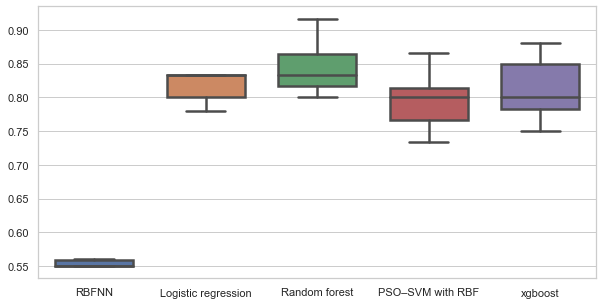

In [10]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(10,5))

ax = sns.boxplot(x=models, y=accuracy, width=0.7,
                 linewidth=2.5)